In [1]:
#first we import the necessary files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
vehicle_df = pd.read_csv(r"veh_20.csv", encoding='ISO-8859-1')
accident_df = pd.read_csv(r"acc_20.csv", encoding='ISO-8859-1')

<ipython-input-2-a99f856a74d9>:1: DtypeWarning: Columns (45,47,127) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_df = pd.read_csv(r"veh_20.csv", encoding='ISO-8859-1')


In [3]:
# Check for null values
print(vehicle_df.isnull().sum())
print(accident_df.isnull().sum())

CASENUM          0
VEH_NO           0
STRATUM          0
STRATUMNAME      0
REGION           0
                ..
NUMINJ_IMNAME    0
V_ALCH_IM        0
V_ALCH_IMNAME    0
PSUSTRAT         0
WEIGHT           0
Length: 167, dtype: int64
CASENUM          0
STRATUM          0
STRATUMNAME      0
REGION           0
REGIONNAME       0
                ..
NO_INJ_IMNAME    0
ALCHL_IM         0
ALCHL_IMNAME     0
PSUSTRAT         0
WEIGHT           0
Length: 80, dtype: int64


In [4]:
# Drop rows with missing CASENUM or key fields
vehicle_df.dropna(subset=['CASENUM'], inplace=True)
accident_df.dropna(subset=['CASENUM', 'REGIONNAME', 'MONTHNAME'], inplace=True)

In [5]:
# Reset indexes
vehicle_df.reset_index(drop=True, inplace=True)
accident_df.reset_index(drop=True, inplace=True)

In [6]:
print("Vehicle Data Shape:", vehicle_df.shape)
print("Accident Data Shape:", accident_df.shape)

print(vehicle_df.columns)
print(accident_df.columns)

Vehicle Data Shape: (94718, 167)
Accident Data Shape: (54745, 80)
Index(['CASENUM', 'VEH_NO', 'STRATUM', 'STRATUMNAME', 'REGION', 'REGIONNAME',
       'PSU', 'PJ', 'PSU_VAR', 'URBANICITY',
       ...
       'PCRASH1_IM', 'PCRASH1_IMNAME', 'MXVSEV_IM', 'MXVSEV_IMNAME',
       'NUMINJ_IM', 'NUMINJ_IMNAME', 'V_ALCH_IM', 'V_ALCH_IMNAME', 'PSUSTRAT',
       'WEIGHT'],
      dtype='object', length=167)
Index(['CASENUM', 'STRATUM', 'STRATUMNAME', 'REGION', 'REGIONNAME', 'PSU',
       'PJ', 'PSU_VAR', 'URBANICITY', 'URBANICITYNAME', 'VE_TOTAL', 'VE_FORMS',
       'PVH_INVL', 'PEDS', 'PERMVIT', 'PERNOTMVIT', 'NUM_INJ', 'NUM_INJNAME',
       'MONTH', 'MONTHNAME', 'YEAR', 'YEARNAME', 'DAY_WEEK', 'DAY_WEEKNAME',
       'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME', 'HARM_EV', 'HARM_EVNAME',
       'ALCOHOL', 'ALCOHOLNAME', 'MAX_SEV', 'MAX_SEVNAME', 'MAN_COLL',
       'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME', 'RELJCT2', 'RELJCT2NAME',
       'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE', 'WRK_ZONENAME', 'REL_R

In [8]:
print(vehicle_df.head())
print(accident_df.head())

        CASENUM  VEH_NO  STRATUM                              STRATUMNAME  \
0  202002121240       1        9  Stratum 9 - LMY PV No Injuries in Crash   
1  202002121240       2        9  Stratum 9 - LMY PV No Injuries in Crash   
2  202002121829       1        8         Stratum 8 - NLMY PV Minor Injury   
3  202002121849       1        9  Stratum 9 - LMY PV No Injuries in Crash   
4  202002121849       2        9  Stratum 9 - LMY PV No Injuries in Crash   

   REGION                                         REGIONNAME  PSU    PJ  \
0       4  West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...   20  4140   
1       4  West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...   20  4140   
2       3  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   28  4139   
3       3  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   12  4142   
4       3  South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...   12  4142   

   PSU_VAR  URBANICITY  ... PCRASH1_IM        PCRASH1_IMNAME  MXVSEV_IM  \
0       20 

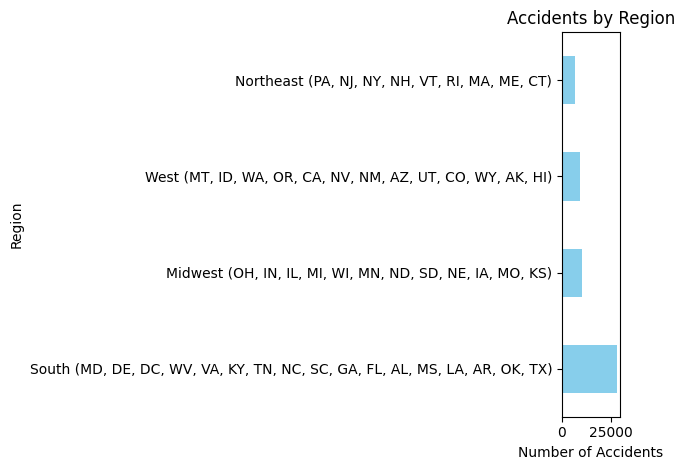

In [9]:
# Now, we will perfrom EDA For Accident Data.

# 1. Accident by Region

region_counts = accident_df['REGIONNAME'].value_counts()
region_counts.plot(kind='barh', color='skyblue')
plt.title("Accidents by Region")
plt.xlabel("Number of Accidents")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

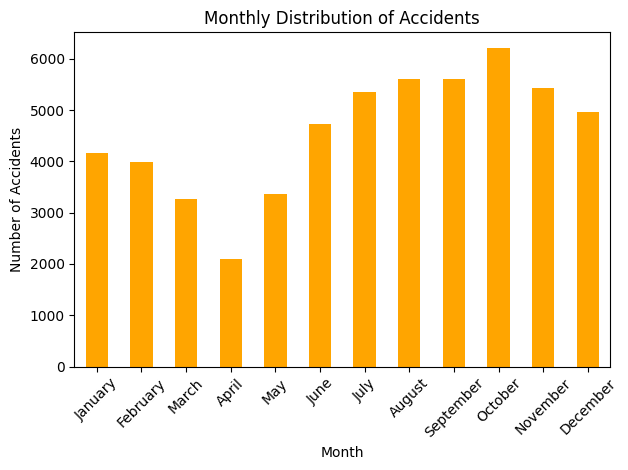

In [10]:
# 2. Monthly Accident Trend

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

month_counts = accident_df['MONTHNAME'].value_counts().reindex(month_order)
month_counts.plot(kind='bar', color='orange')
plt.title("Monthly Distribution of Accidents")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

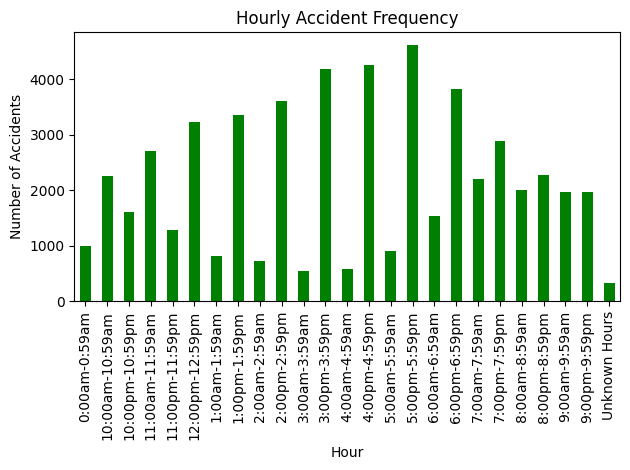

In [11]:
# 3. Accidents by Hour

hour_counts = accident_df['HOURNAME'].value_counts().sort_index()
hour_counts.plot(kind='bar', color='green')
plt.title("Hourly Accident Frequency")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

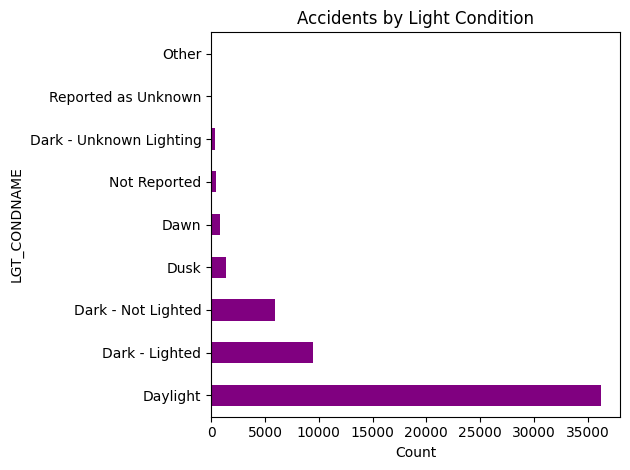

In [12]:
#  4. Impact of Light Condition on Accidents.

light_counts = accident_df['LGT_CONDNAME'].value_counts()
light_counts.plot(kind='barh', color='purple')
plt.title("Accidents by Light Condition")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

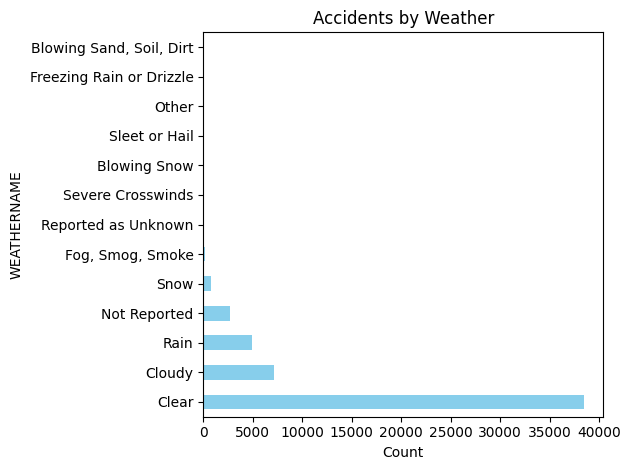

In [13]:
# 5. Impact of Weather Condition on Accidents.

weather_counts = accident_df['WEATHERNAME'].value_counts()
weather_counts.plot(kind='barh', color='skyblue')
plt.title("Accidents by Weather")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

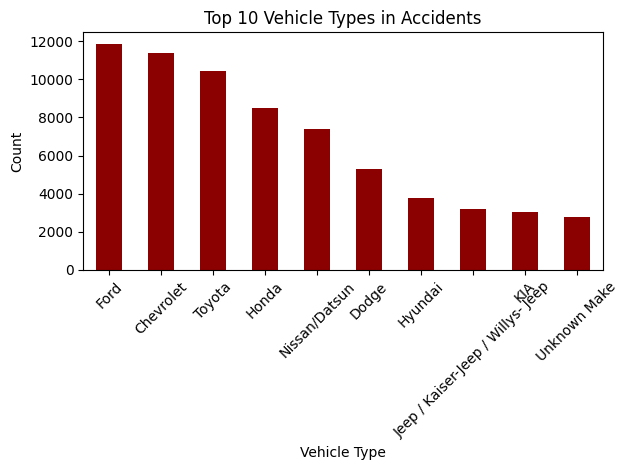

In [14]:
#  Now, we will perform EDA for Vehicle Data.

# 1. Vehicle Type Distribution

if 'MAKENAME' in vehicle_df.columns:
    vehicle_type_counts = vehicle_df['MAKENAME'].value_counts().head(10)
    vehicle_type_counts.plot(kind='bar', color='darkred')
    plt.title("Top 10 Vehicle Types in Accidents")
    plt.xlabel("Vehicle Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

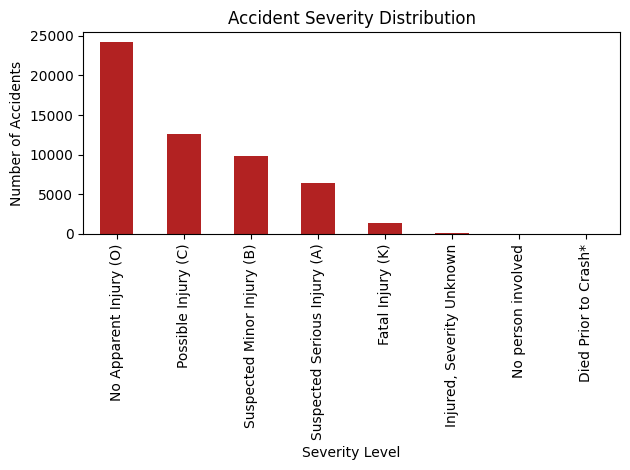

In [15]:
# How Serious are the accidents?
# 1. Accident Severity Distribution

severity_counts = accident_df['MAXSEV_IMNAME'].value_counts()
severity_counts.plot(kind='bar', color='firebrick')
plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

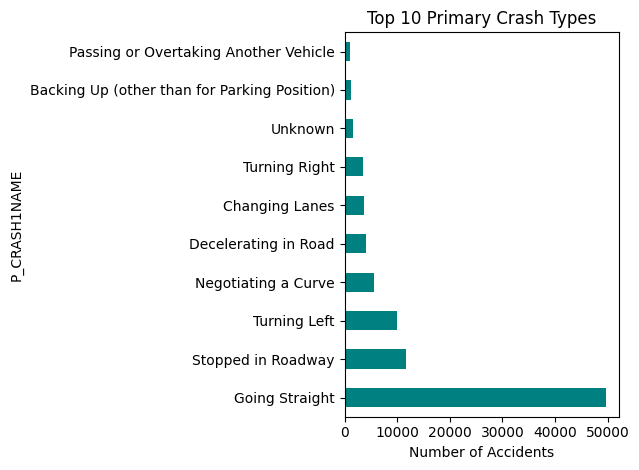

In [16]:
# 2. Top 10 Primary Crash Types

crash_types = vehicle_df['P_CRASH1NAME'].value_counts().head(10)
crash_types.plot(kind='barh', color='teal')
plt.title("Top 10 Primary Crash Types")
plt.xlabel("Number of Accidents")
plt.tight_layout()
plt.show()

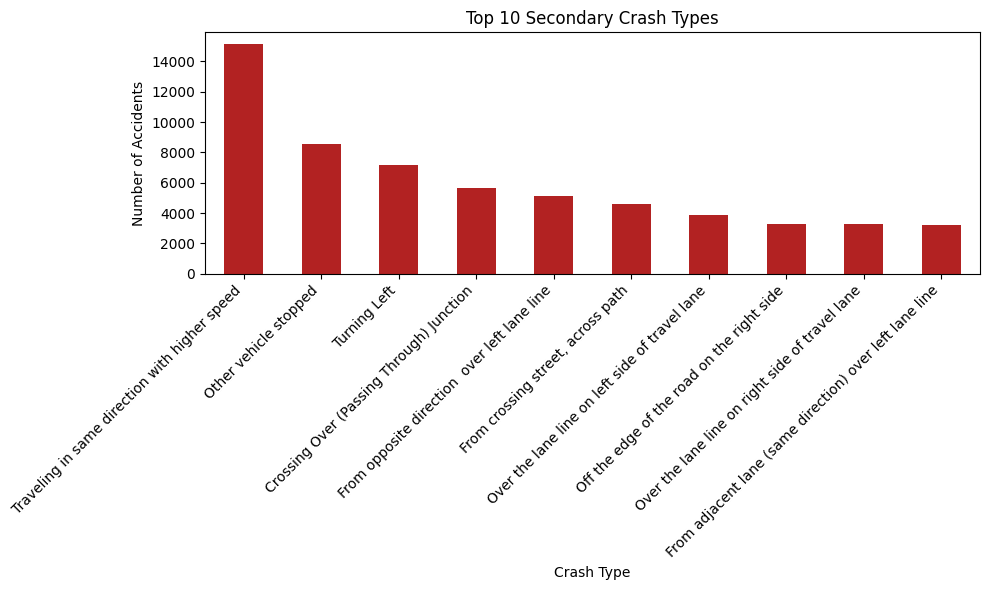

In [17]:
# 3. Top 10 Secondary Crash Types

secondary_crash_types = vehicle_df['P_CRASH2NAME'].value_counts().head(10)

secondary_crash_types.plot(kind='bar', color='firebrick', figsize=(10, 6))
plt.title("Top 10 Secondary Crash Types")
plt.xlabel("Crash Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right')  # angled for readability
plt.tight_layout()
plt.show()

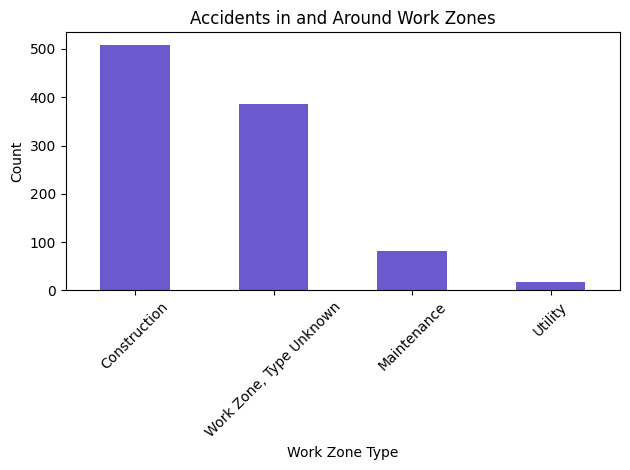

In [18]:
# 4. Work Zone Accidents

workzone_counts = accident_df['WRK_ZONENAME'].value_counts()
workzone_counts.plot(kind='bar', color='slateblue')
plt.title("Accidents in and Around Work Zones")
plt.xlabel("Work Zone Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

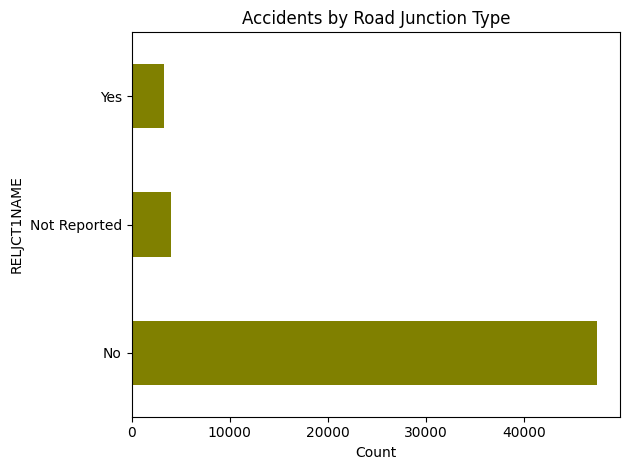

In [19]:
# Accidents by Road Junction Type

junction_counts = accident_df['RELJCT1NAME'].value_counts().head(10)
junction_counts.plot(kind='barh', color='olive')
plt.title("Accidents by Road Junction Type")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

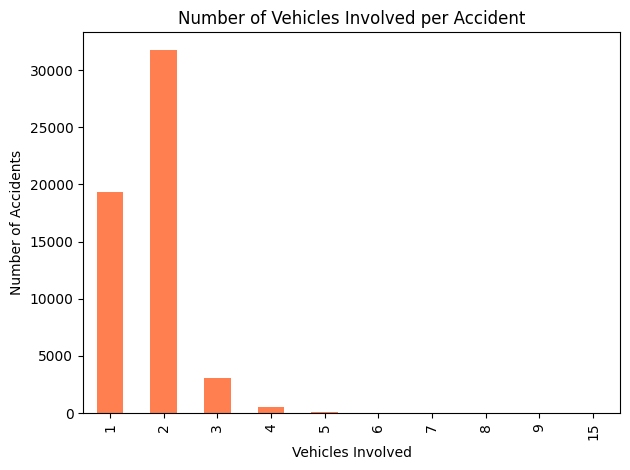

In [20]:
#  Multiple Vehicle Involvement

vehicle_counts = vehicle_df['CASENUM'].value_counts()
num_vehicles_per_accident = vehicle_counts.value_counts().sort_index()

num_vehicles_per_accident.plot(kind='bar', color='coral')
plt.title("Number of Vehicles Involved per Accident")
plt.xlabel("Vehicles Involved")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

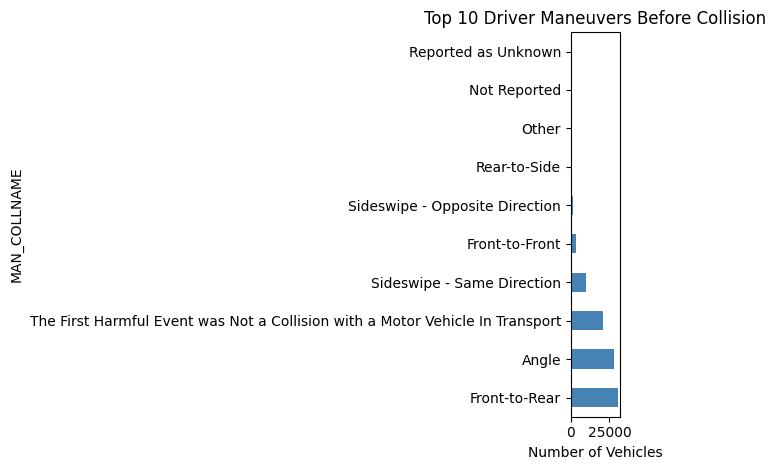

In [21]:
#  Shows common vehicle maneuvers like turning, going straight, or changing lanes just before accidents.

if 'MAN_COLLNAME' in vehicle_df.columns:
    maneuvers = vehicle_df['MAN_COLLNAME'].value_counts().head(10)
    maneuvers.plot(kind='barh', color='steelblue')
    plt.title("Top 10 Driver Maneuvers Before Collision")
    plt.xlabel("Number of Vehicles")
    plt.tight_layout()
    plt.show()

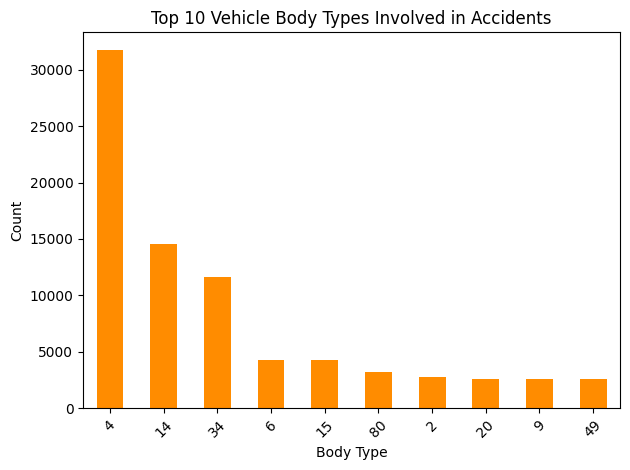

In [22]:
if 'BODY_TYP' in vehicle_df.columns:
    body_type_counts = vehicle_df['BODY_TYP'].value_counts().head(10)
    body_type_counts.plot(kind='bar', color='darkorange')
    plt.title("Top 10 Vehicle Body Types Involved in Accidents")
    plt.xlabel("Body Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()